In [1]:
# Import libraries
import numpy as np
import scipy as sc
from scipy import integrate
import matplotlib.pyplot as plt
import math as m
from tqdm import tqdm
import time
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')
# plt.style.use('dark_background')
import json
import os

# Import custom functions
from optic_simulations import optic_forces, plot_forces
from rtx_model import OpticRTX 
from optic_integrands import *
from mycolorpy import colorlist as mcp

SyntaxError: invalid syntax (rtx_model.py, line 51)

In [2]:
def plot_window(result_dict_):
    mat = []
    for i in sorted(result_dict_.keys()):
        z = result_dict_[i]['positions']['z']
        values = result_dict_[i]['results']['total'][1]
        mat.append(values)
    mat = np.array(mat)
    plt.imshow(mat)
    return mat

In [13]:
textwidth = 5.39 #in


0.0005 0.0003535533905932738
0.001 0.0007071067811865476
0.003 0.002121320343559643
0.0035 0.0024748737341529167


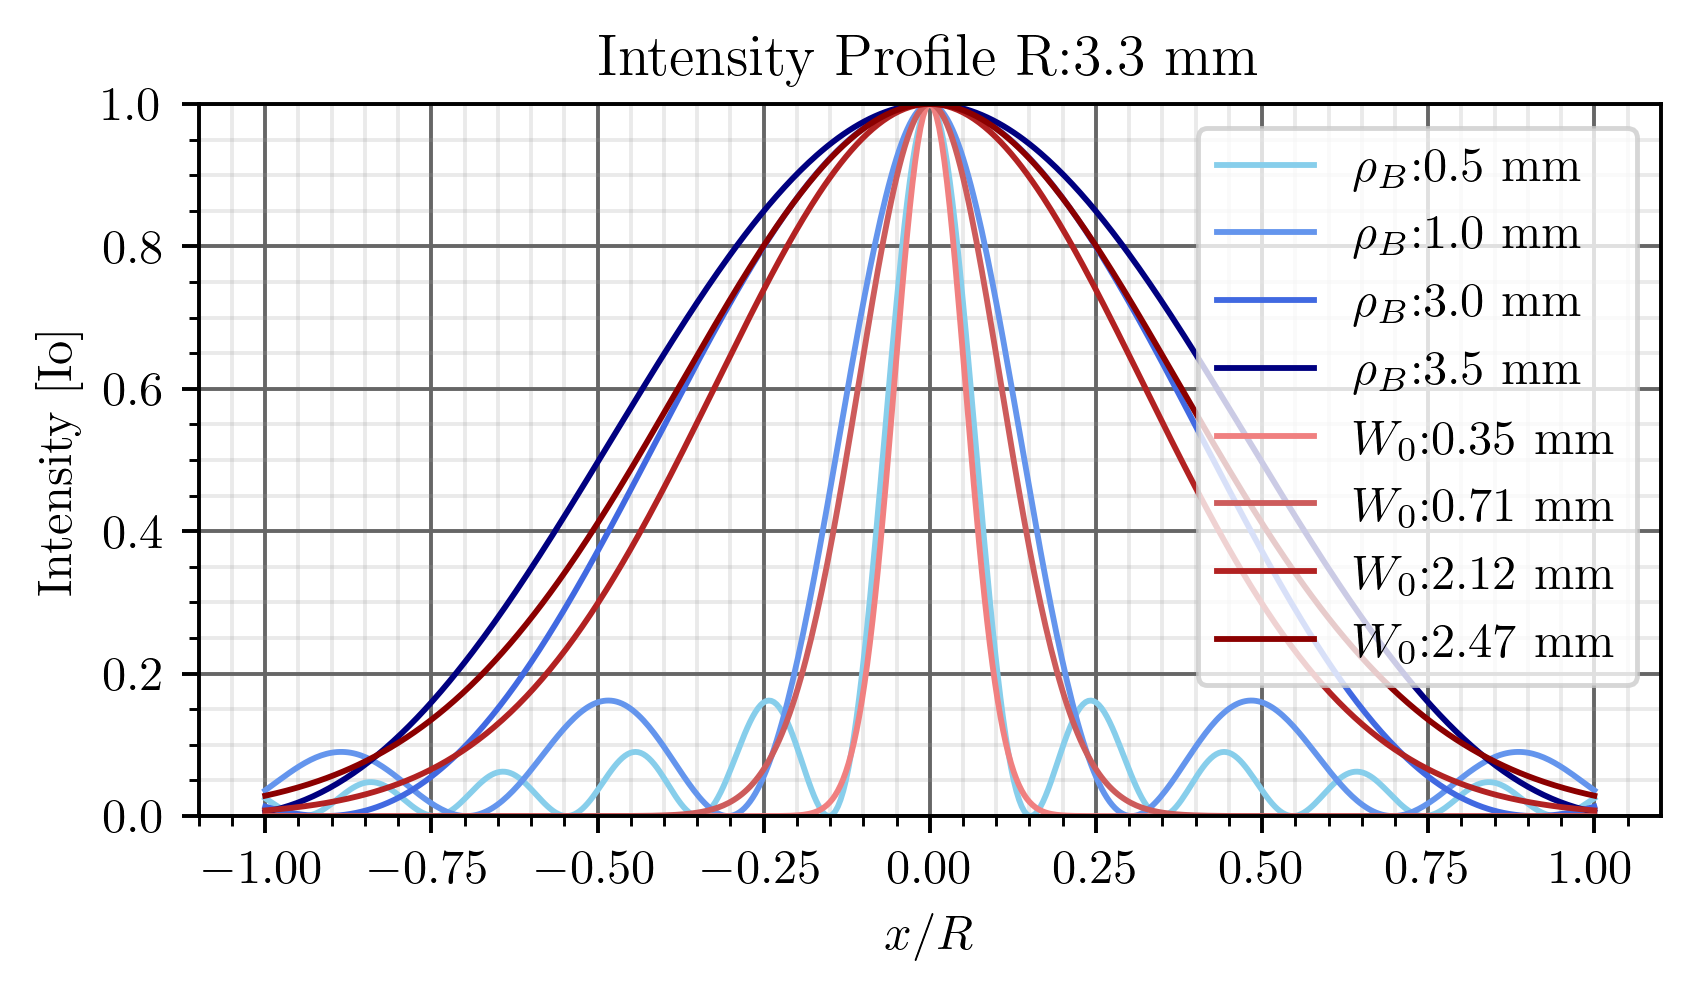

In [8]:
R = 3.3e-3
# plt.rcParams['figure.format'] = 'svg'
lw = 1.2
plt.rcParams['figure.figsize'] = (textwidth, textwidth/2)
plt.rcParams['figure.dpi'] = (350)
# mpl.rc('xtick', labelsize=7) 
# mpl.rc('ytick', labelsize=7)
# mpl.rc('axes', labelsize=7)
# mpl.rc('legend', fontsize=7)
# mpl.rc('axes', titlesize=9)
mpl.rc('text', usetex=True)
rho_B = np.arange(2,3.5,0.5)*1e-3
rho_B = np.array([0.5, 1.0, 3.0,  3.5])*1e-3
rho = np.linspace(-R,R,500)
gauss_c = ['lightcoral','indianred','firebrick','darkred']
bess_c = ['skyblue','cornflowerblue','royalblue','navy']
for j in range(len(rho_B)):
    bessel = Bessel(rho,rho_B[j])**2
    plt.plot(rho/R,bessel,label=r'$\rho_B$:{} mm'.format(round(rho_B[j]*1e3,2)),color=bess_c[j],lw=lw)
for j in range(len(rho_B)):
    w0 = (rho_B[j]/2)*np.sqrt(2)
    print(rho_B[j],w0)
    gauss = Gaussian(rho,w0/2)
    plt.plot(rho/R,gauss,label='$W_0$:{} mm'.format(round(w0*1e3,2)),color=gauss_c[j],lw=lw)
plt.legend(loc='upper right')       
plt.title(f'Intensity Profile R:{R*1e3} mm')
plt.xlabel('$x/R$')
plt.ylabel('Intensity [Io]')
plt.grid()
plt.ylim((0,1))
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()  
plt.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/intesity_profile.png'), bbox_inches='tight')
plt.show()

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists


Text(0.5, 0.98, 'Total Force: Multiple NA Grid')

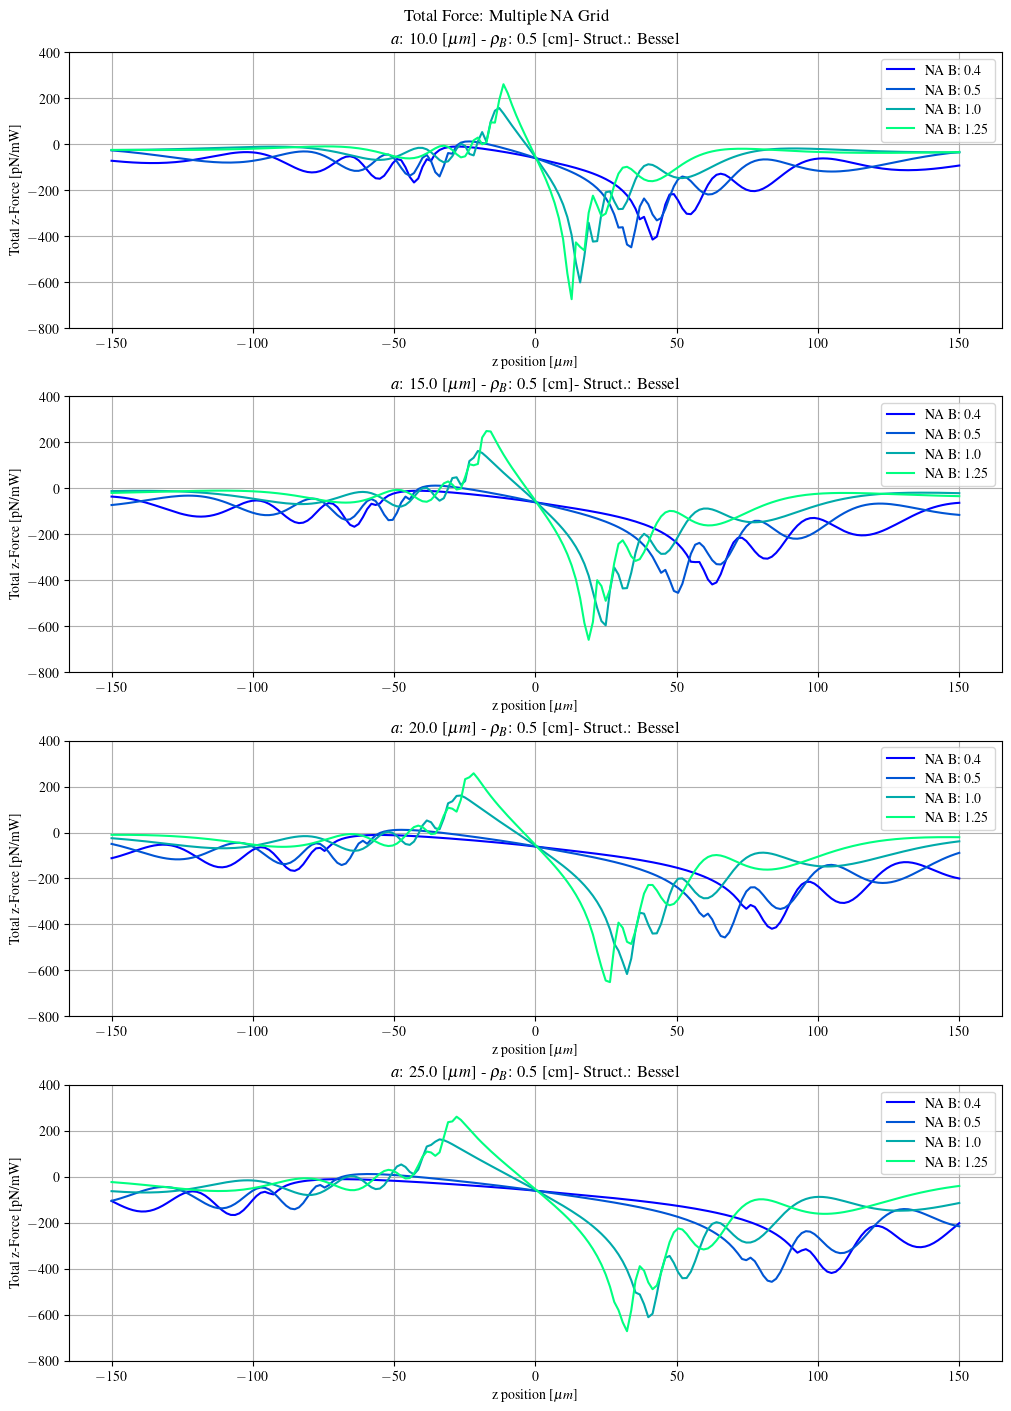

In [9]:
plt.style.use('default')
plt.rcParams['text.usetex'] = True
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10)
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
sim_list = []
for i in range(4):
    sim_list.append(OpticRTX('NA',structure='Bessel'))
for i,j in enumerate(['S_NA_1_1.json', 'S_NA_2_1.json', 'S_NA_3_1.json', 'S_NA_4_1.json']):
    sim_list[i].load_simulation(f'../Final/{j}')
    
#sim_list = [test, test, test, test]
fig = plt.figure(layout='constrained', figsize=(10,14))
plot_subplot(fig, [1,4], sim_list, 'a', 'W')
fig.suptitle('Total Force: Multiple NA Grid')

In [2]:
def plot_subplot(fig, fig_shape, simulation_lists,t_param_1, t_param_2, simulation_lists_gauss=None):
    spec = fig.add_gridspec(ncols=fig_shape[0], nrows=fig_shape[1])
    i=0
    for column in range(fig_shape[0]):
        for row in range(fig_shape[1]):
            ax = fig.add_subplot(spec[row,column])
            params = simulation_lists[i].param
            simulation_lists[i].plot_simulation(orientation='up', colormap='winter', ax_=ax, t_param_1=t_param_1, t_param_2=t_param_2)
            if simulation_lists_gauss is not None:
                params = simulation_lists_gauss[i].param
                simulation_lists_gauss[i].plot_simulation(orientation='up', colormap='autumn', ax_=ax, t_param_1=t_param_1, t_param_2=t_param_2, linest='--')
            #ax.set_title(f'{t_param_1}: {params[t_param_1]} - {t_param_2}: {params[t_param_2]}')
            ax.plot([-150,150],[0,0],color='black')
            # ax.set_ylim((-800,400))
            ax.grid(visible=True, which='major', color='#666666', linestyle='-')
            ax.minorticks_on()  
            ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
            i+=1

In [3]:
def plot_column(file_names, structure, title, variable, t_var_1, t_var_2,sav_fname, gauss=True):
    plt.style.use('default')
    plt.rcParams['text.usetex'] = True
    s=4
    mpl.rc('xtick', labelsize=16+s) 
    mpl.rc('ytick', labelsize=16+s)
    mpl.rc('axes', labelsize=16+s)
    mpl.rc('axes', titlesize=18+s)
    mpl.rc('legend', fontsize=14+s)
    mpl.rc('figure', titlesize=20+s)
    mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
    sim_list = []
    for i in range(len(file_names)):
        sim_list.append(OpticRTX(variable,structure=structure))
    for i,j in enumerate(file_names):
        sim_list[i].load_simulation(f'../Final/{j}')
    if gauss:
        sim_list_gauss = []
        for i in range(len(file_names)):
            sim_list_gauss.append(OpticRTX(variable,structure='Gaussian'))
        for i,j in enumerate([i.replace('WB','WG') for i in file_names]):
            sim_list_gauss[i].load_simulation(f'../Final/{j}')
    else:
        sim_list_gauss = None

    #sim_list = [test, test, test, test]
    fig = plt.figure(layout='constrained', figsize=(18,24))
    plot_subplot(fig, [2,4], sim_list, t_var_1, t_var_2, sim_list_gauss)
    # fig.suptitle(title)
    plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/{sav_fname}_v3.png'))

In [18]:
t =OpticRTX(variable='W',structure='Bessel')
t.load_simulation('../Final/S_WB_1_1.json')

RTXModel_structure-Bessel_aberration-False


A simulation was not generated, checking if loaded simulation exists


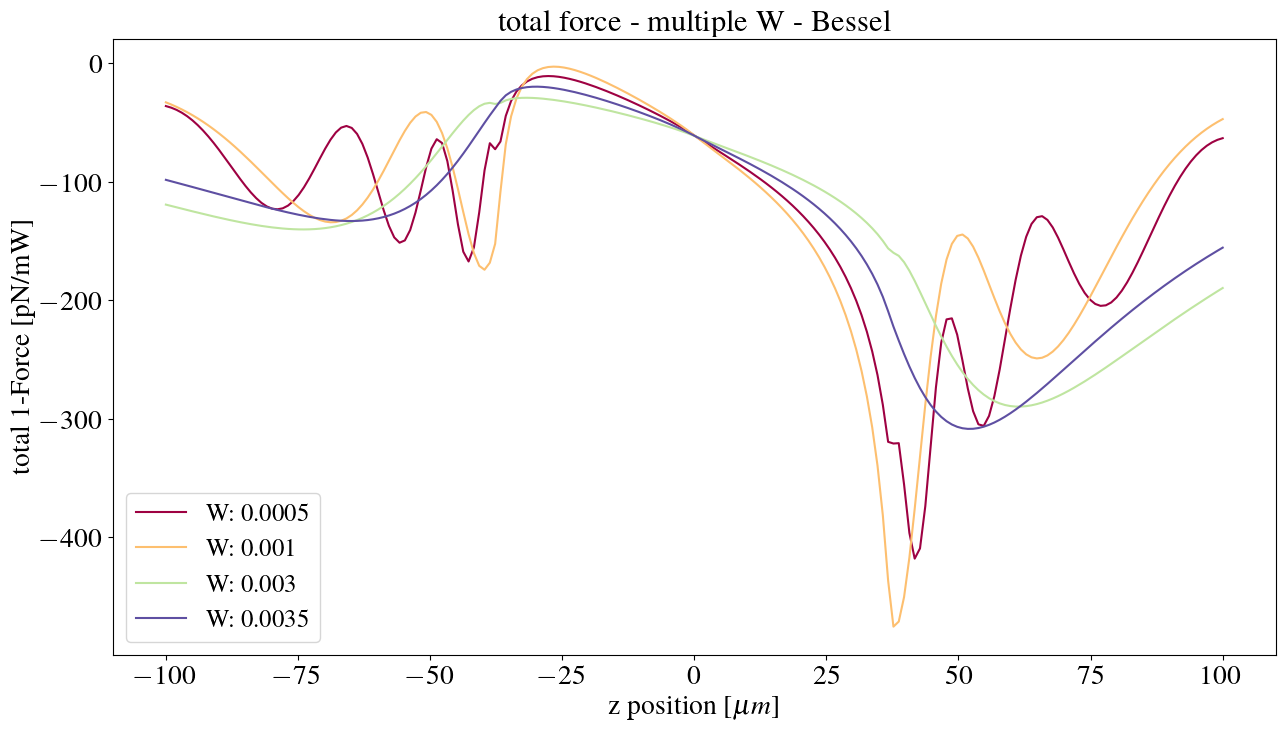

In [20]:
t.plot_simulation(orientation='up')

In [4]:
p = 3
plot_column([f'S_WB_{i}_{j}.json' for i in range(1,3) for j in range(1,5)], 
           'Bessel', f'Total Force: Multiple Waist Grid Pt.1', 'W', 'a','NA',
           f'grid_1', gauss=True)

NameError: name 'OpticRTX' is not defined

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not

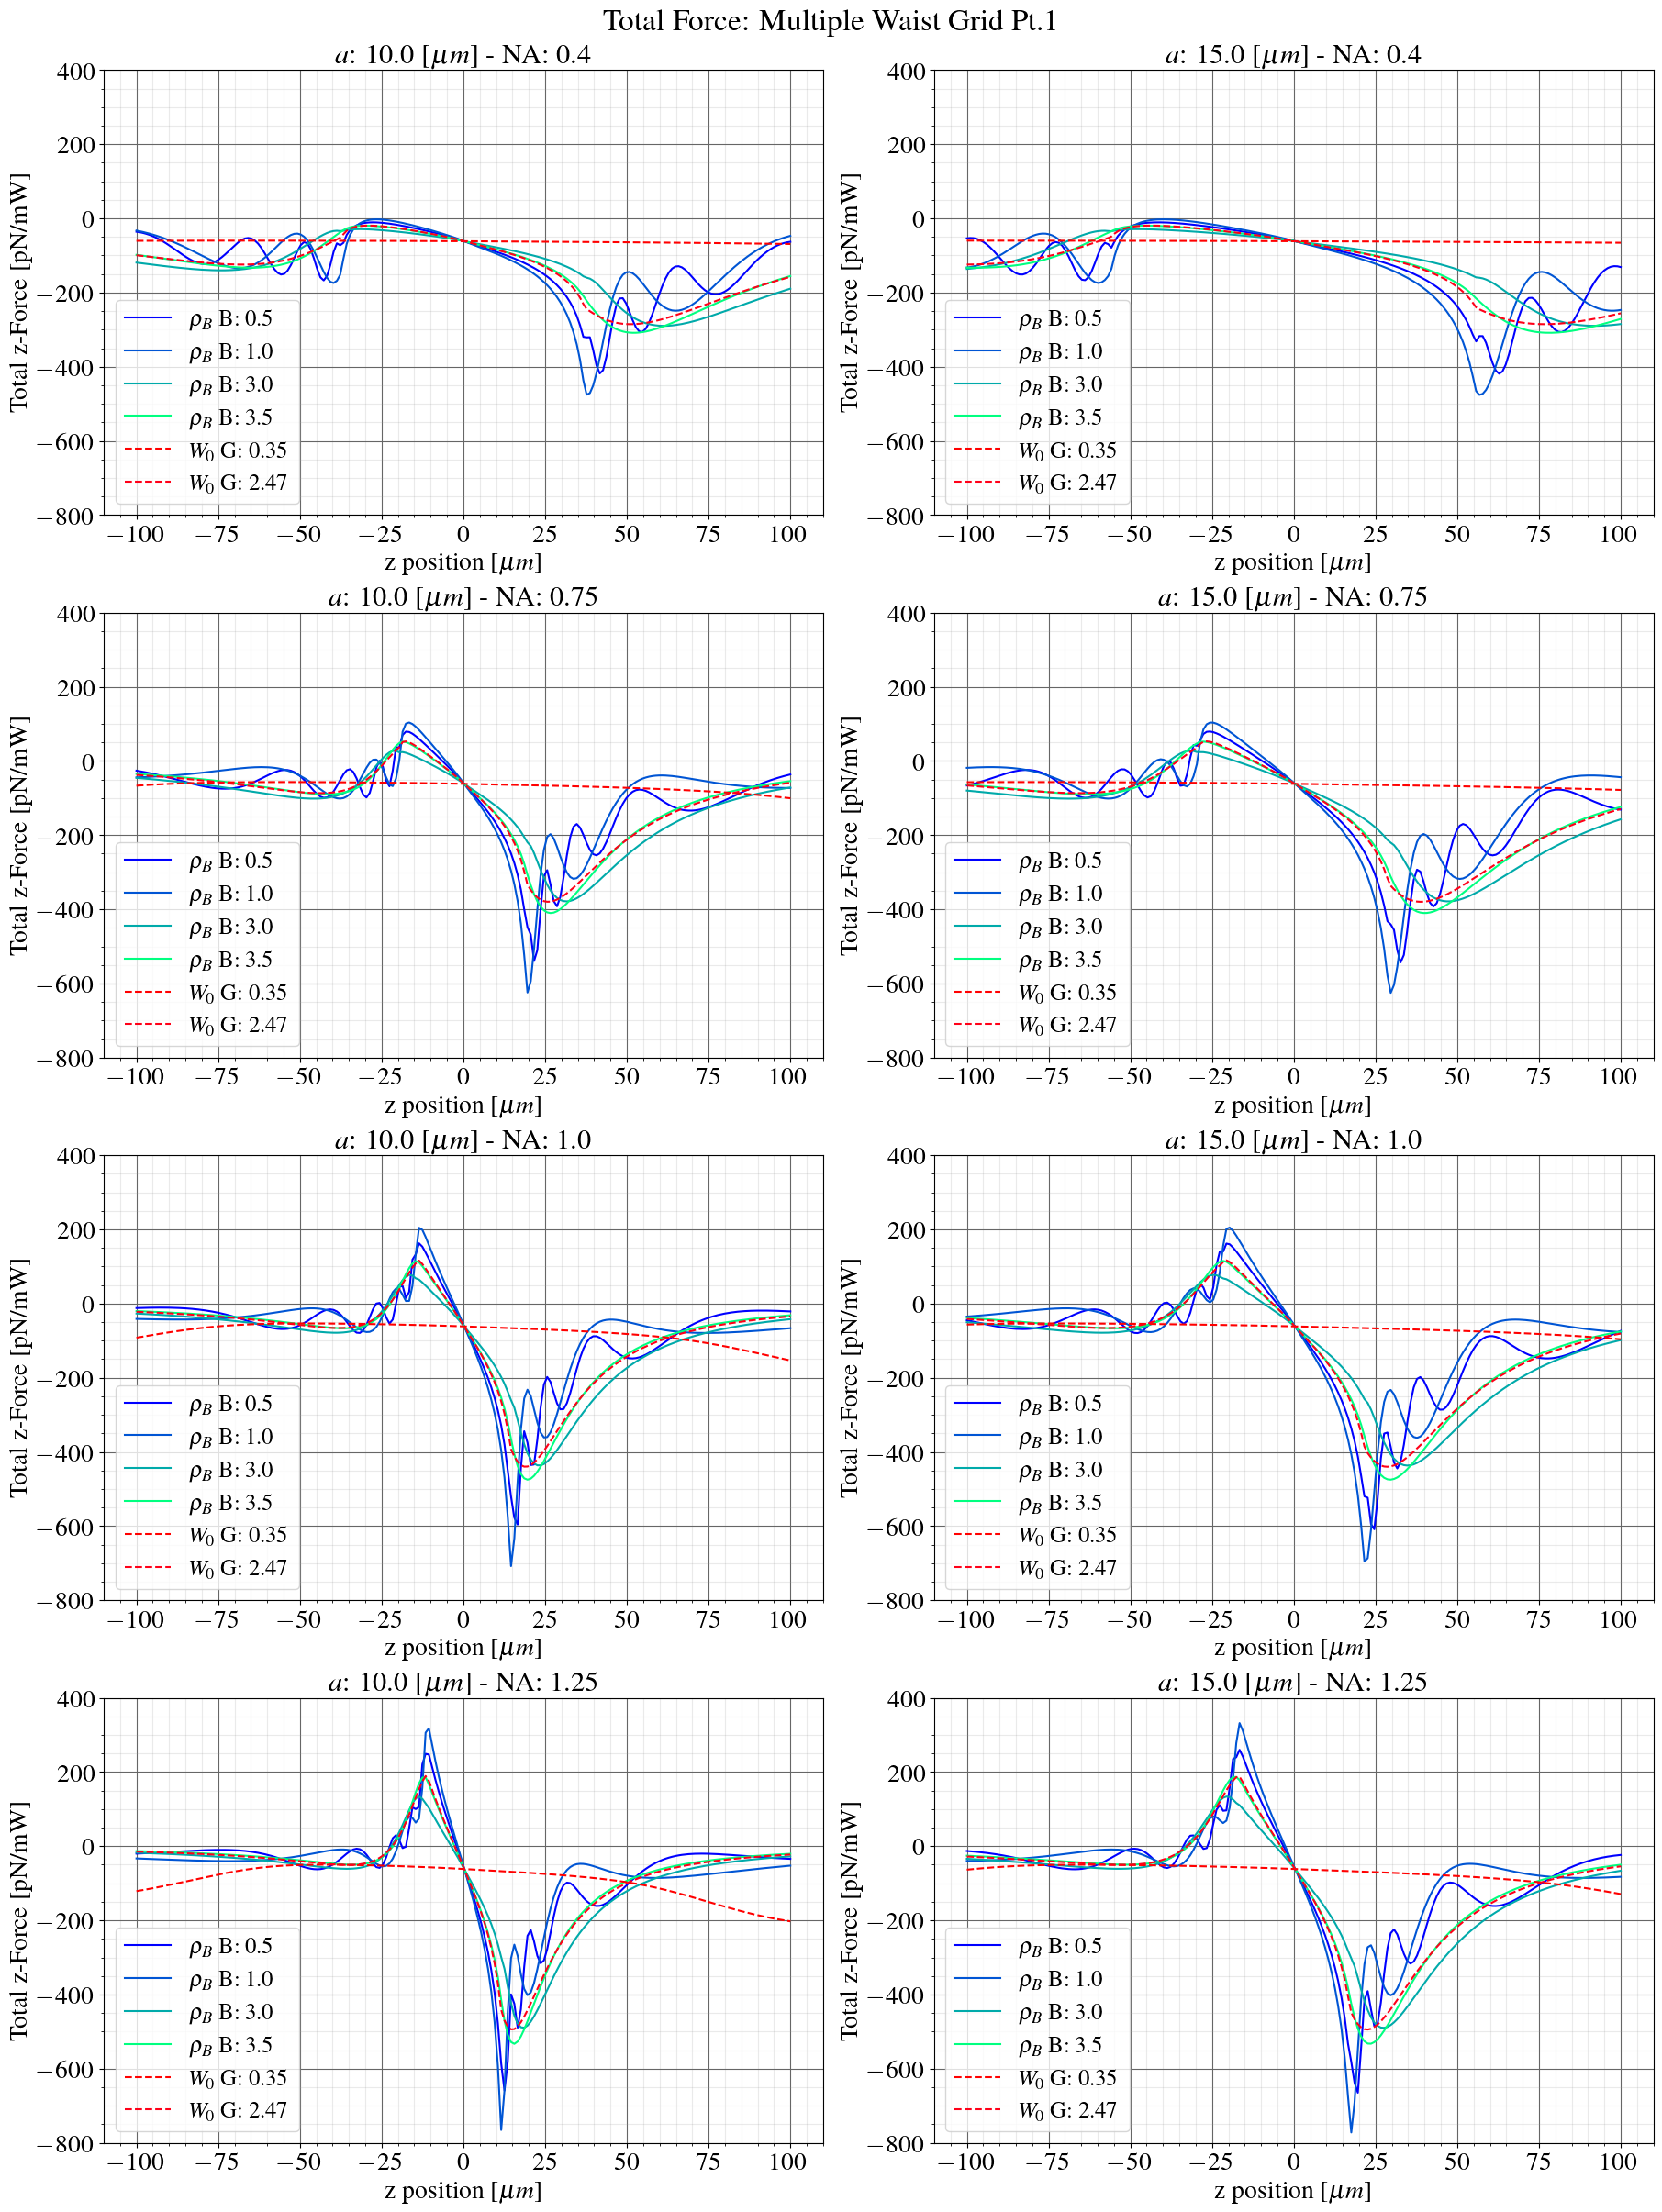

In [42]:
p = 3
plot_column([f'S_WB_{i}_{j}.json' for i in range(1,3) for j in range(1,5)], 
           'Bessel', f'Total Force: Multiple Waist Grid Pt.1', 'W', 'a','NA',
           f'grid_1', gauss=True)

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not

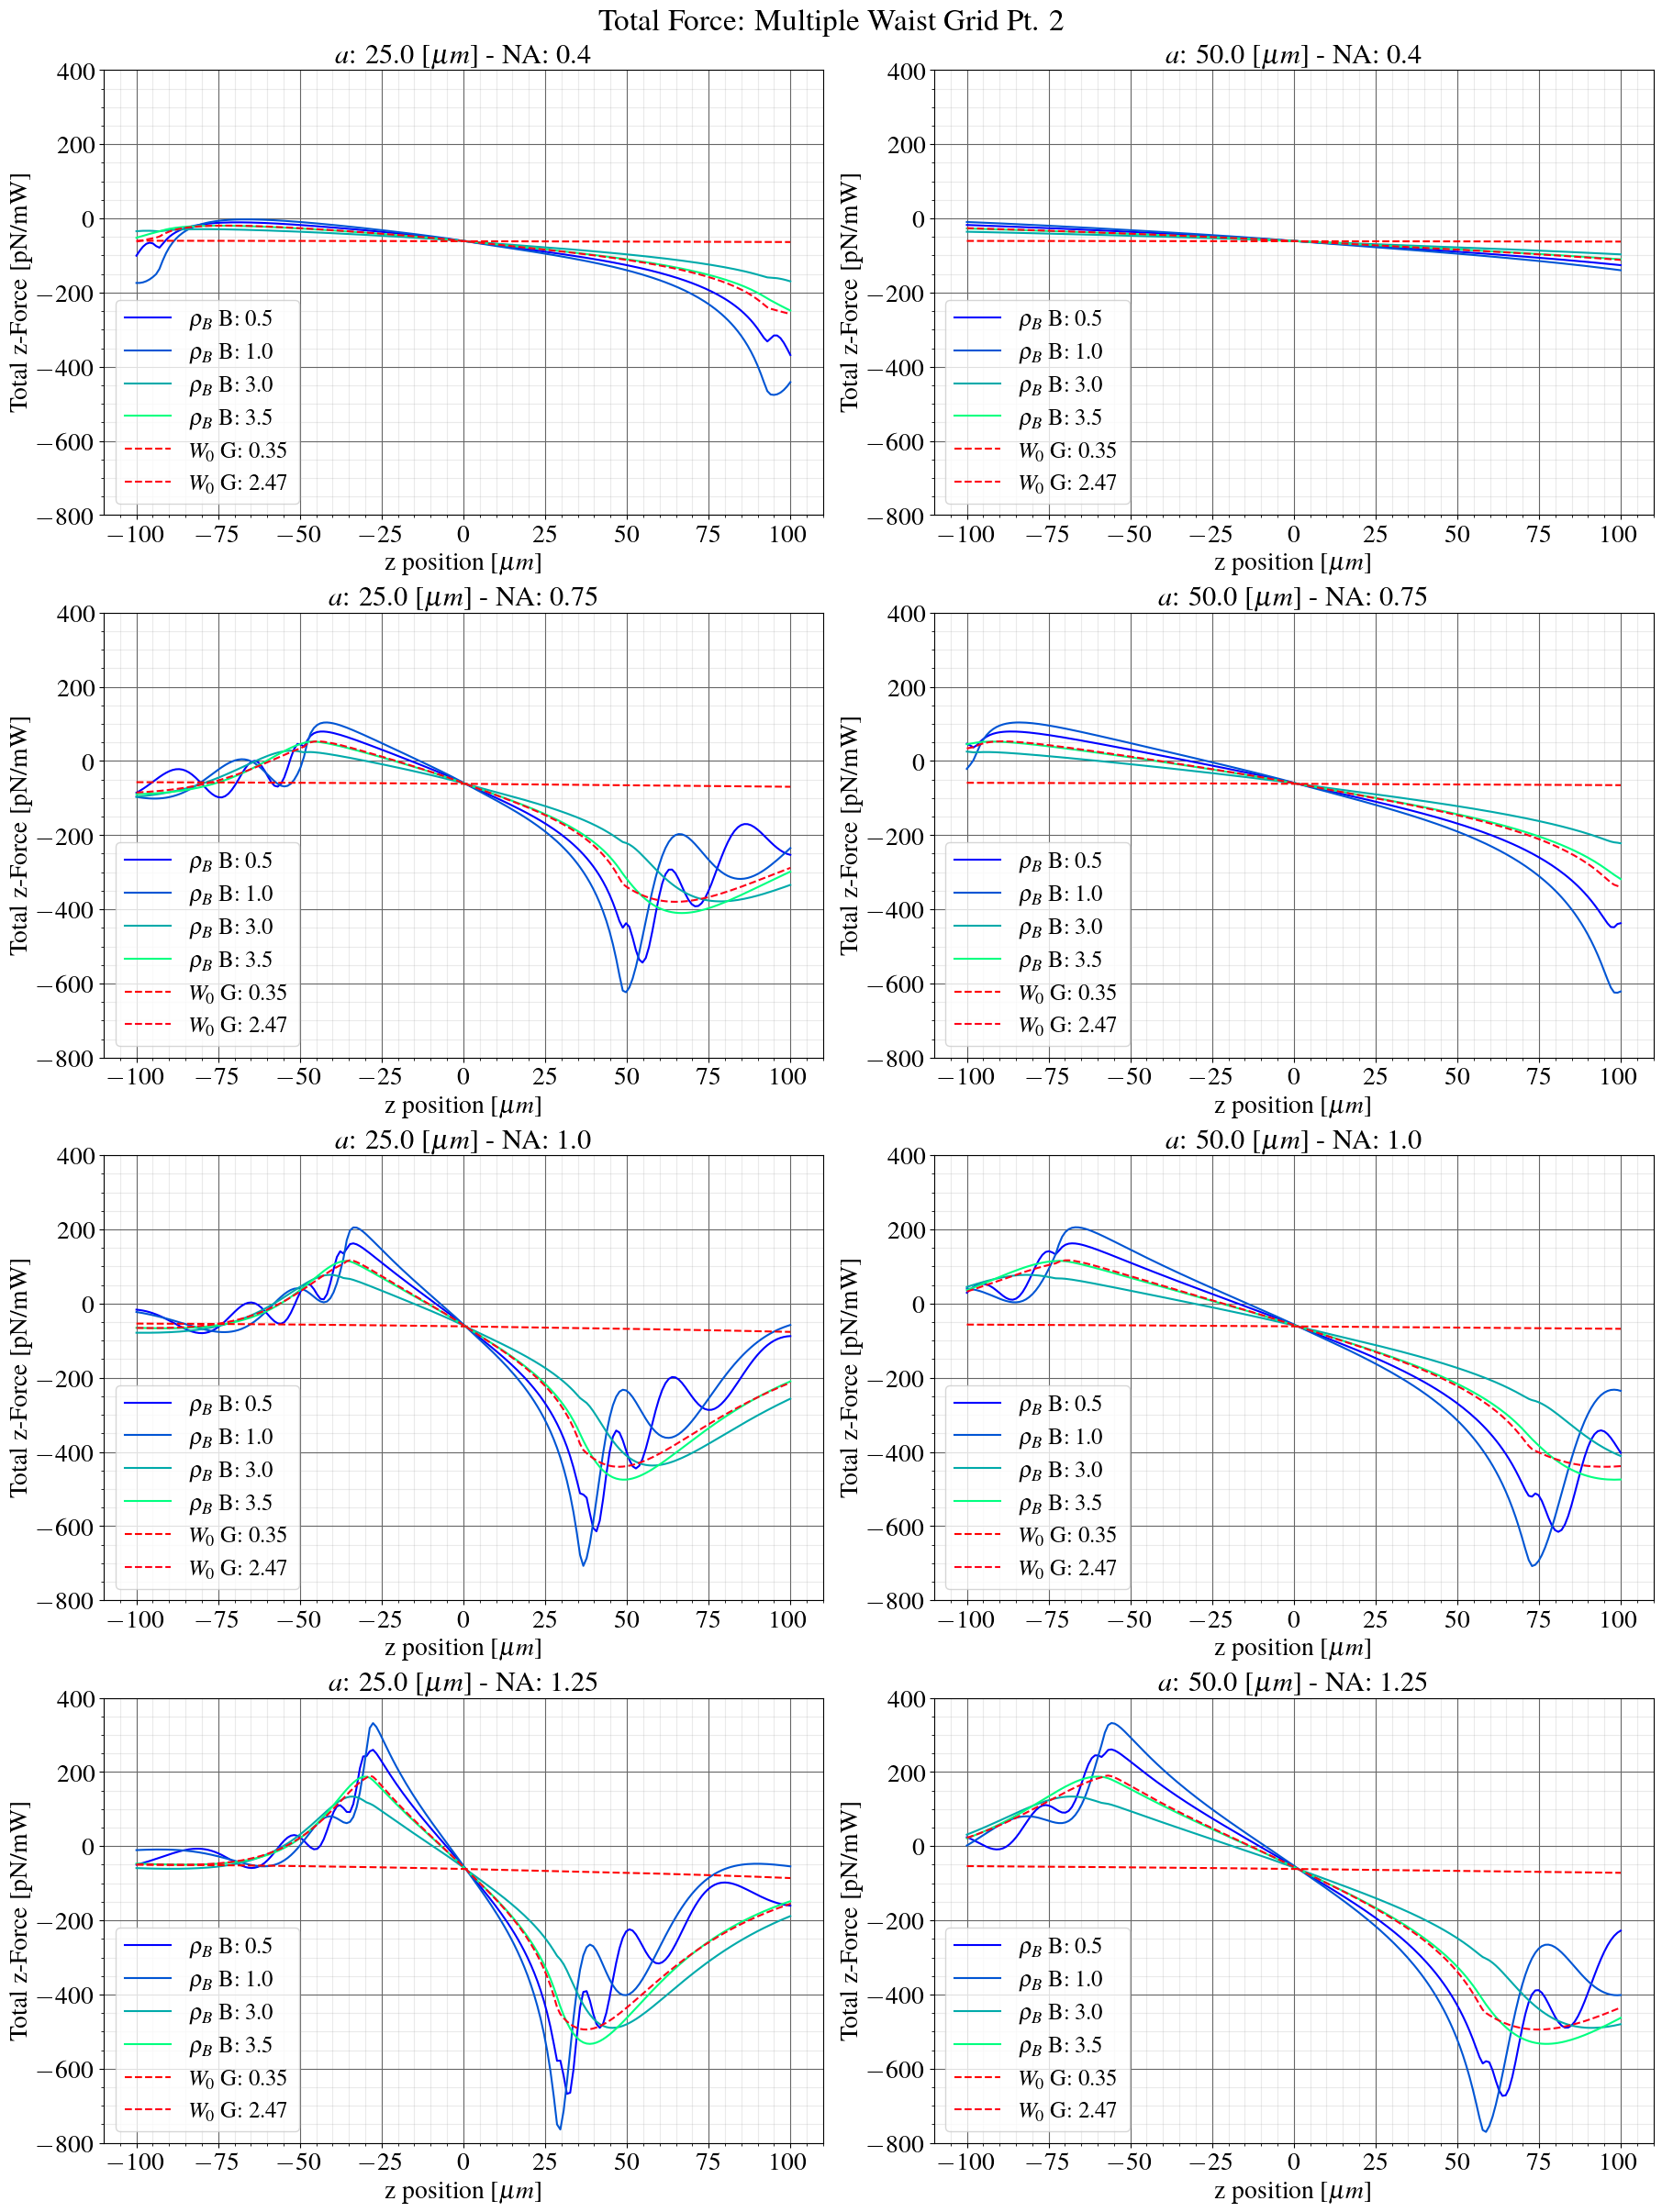

In [44]:
p = 3
plot_column([f'S_WB_{i}_{j}.json' for i in range(3,5) for j in range(1,5)], 
           'Bessel', f'Total Force: Multiple Waist Grid Pt. 2', 'W', 'a','NA',
           f'grid_2')

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
RTXModel_structure-Gaussian_aberration-False
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not

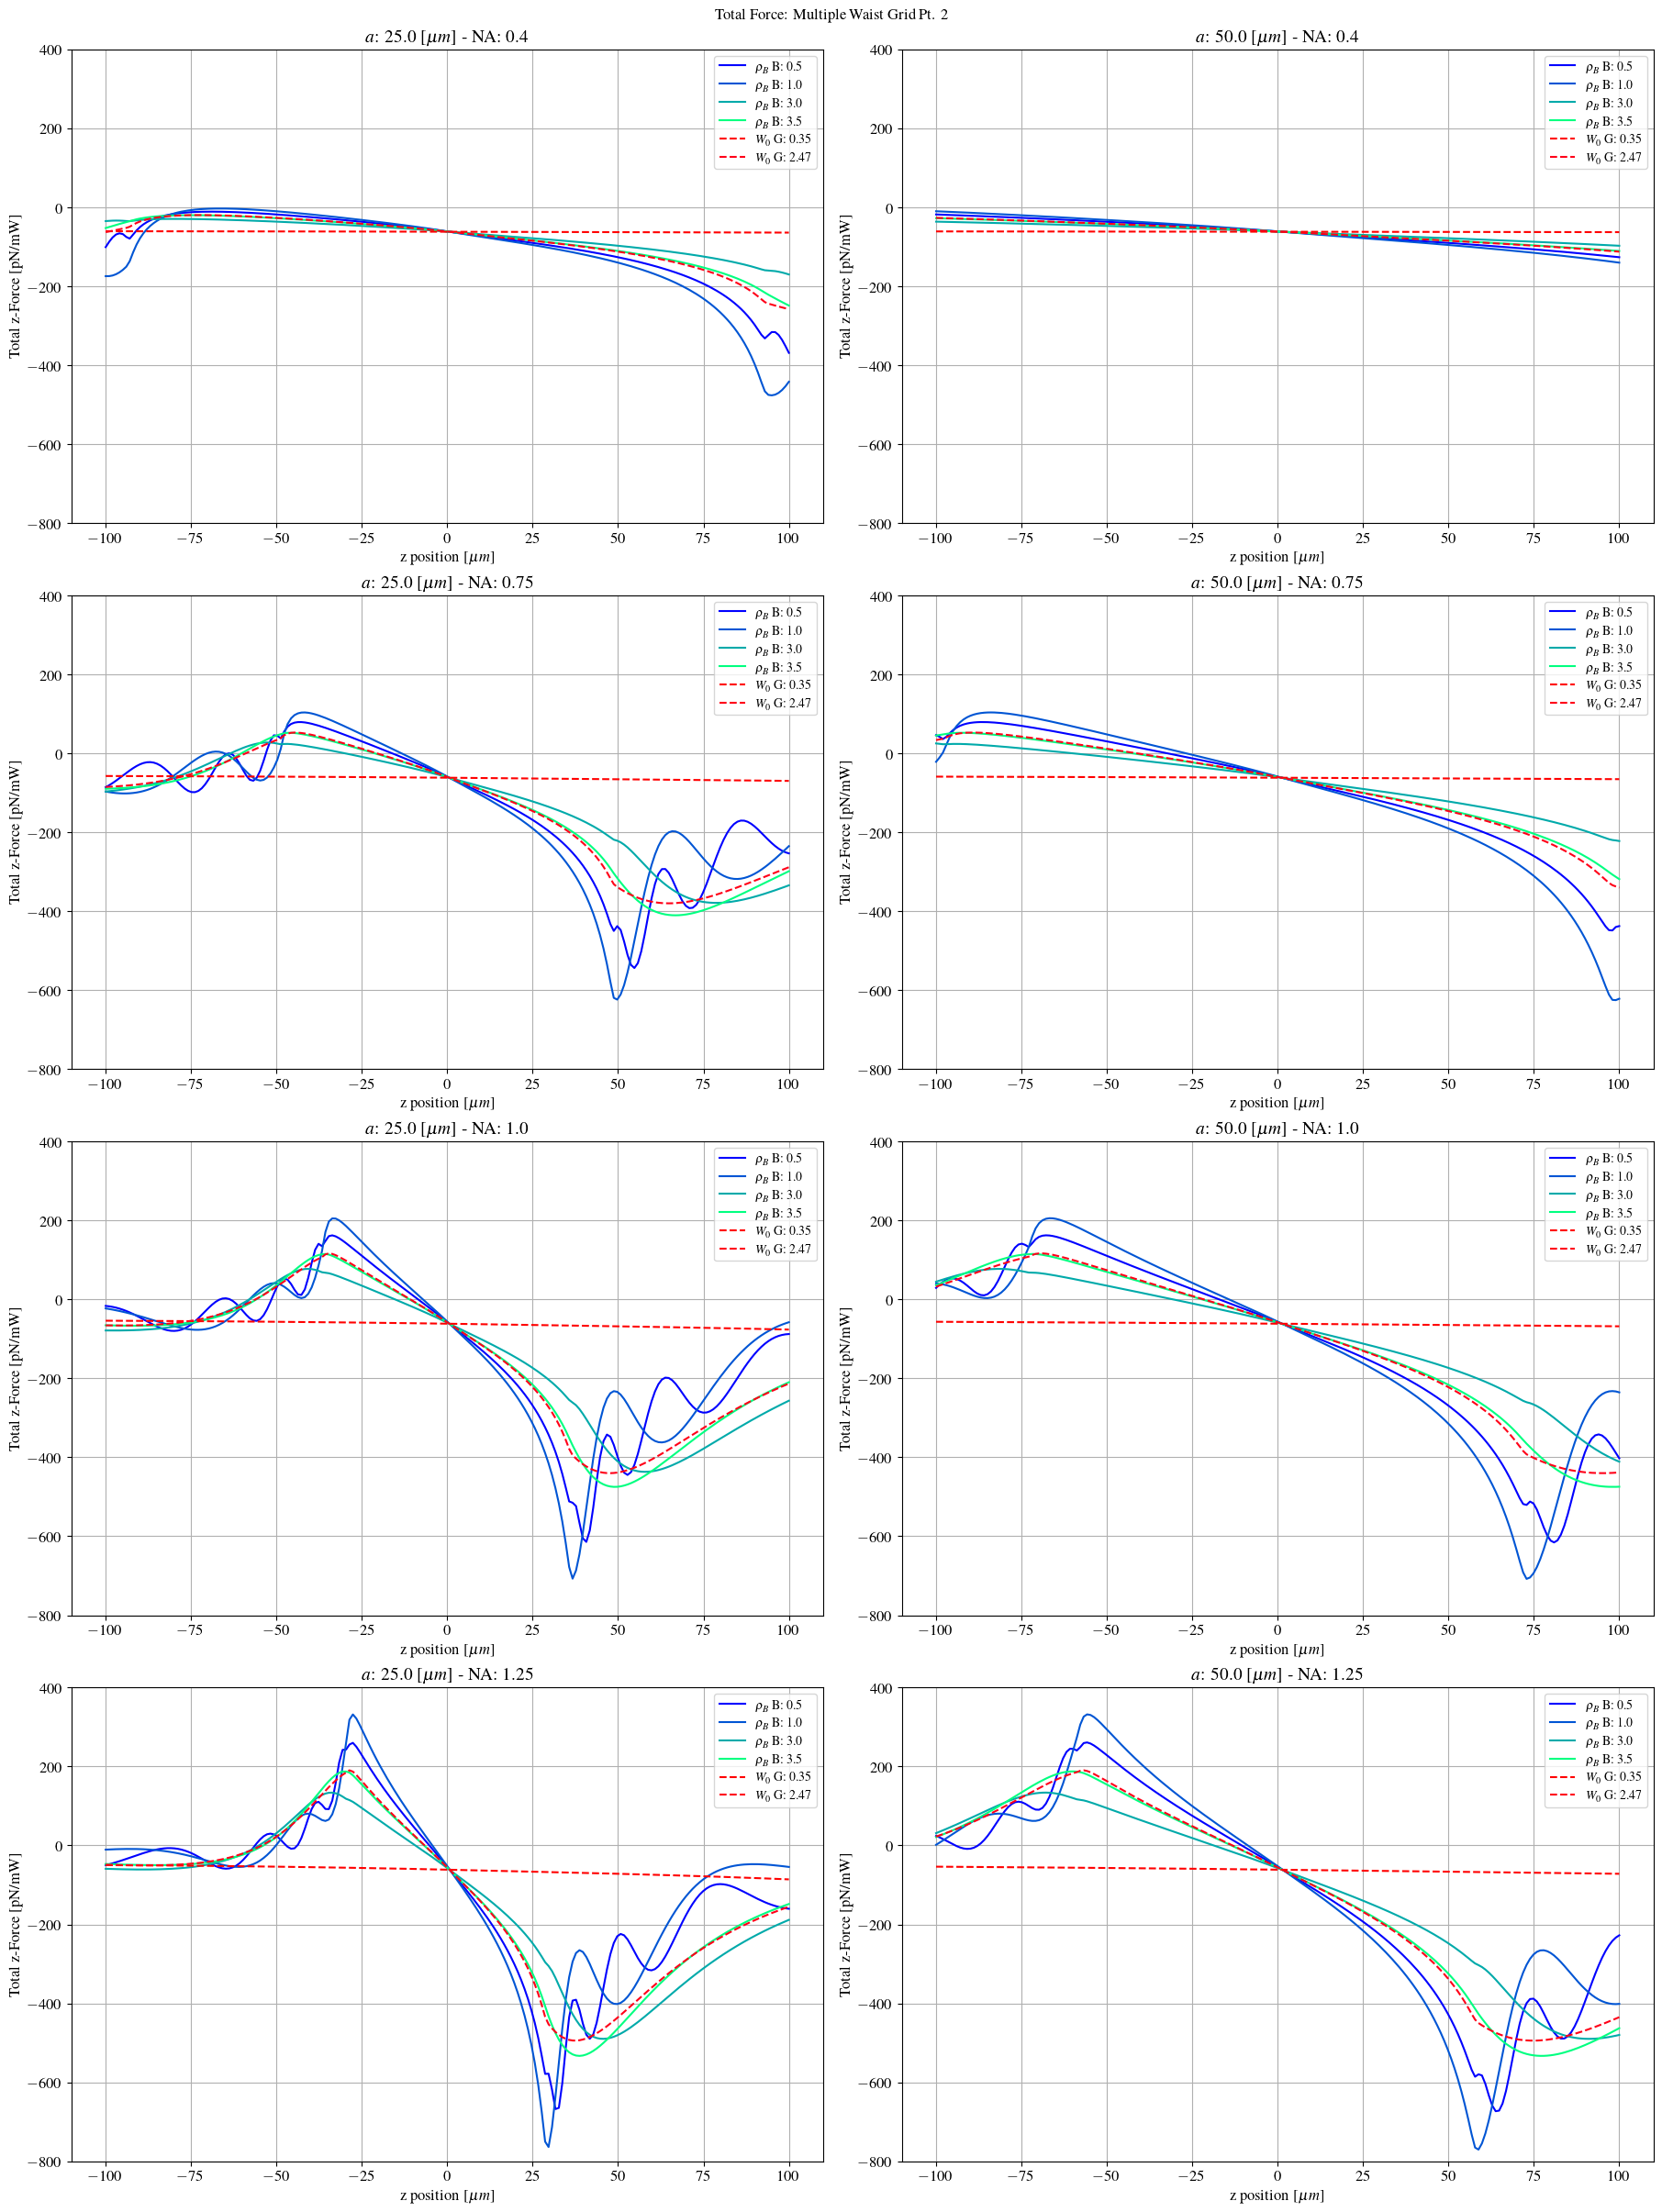

In [7]:
p = 3
plot_column([f'S_WB_{i}_{j}.json' for i in range(3,5) for j in range(1,5)], 
           'Bessel', f'Total Force: Multiple Waist Grid Pt. 2', 'W', 'a','NA',
           f'grid_2.png')

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, chec

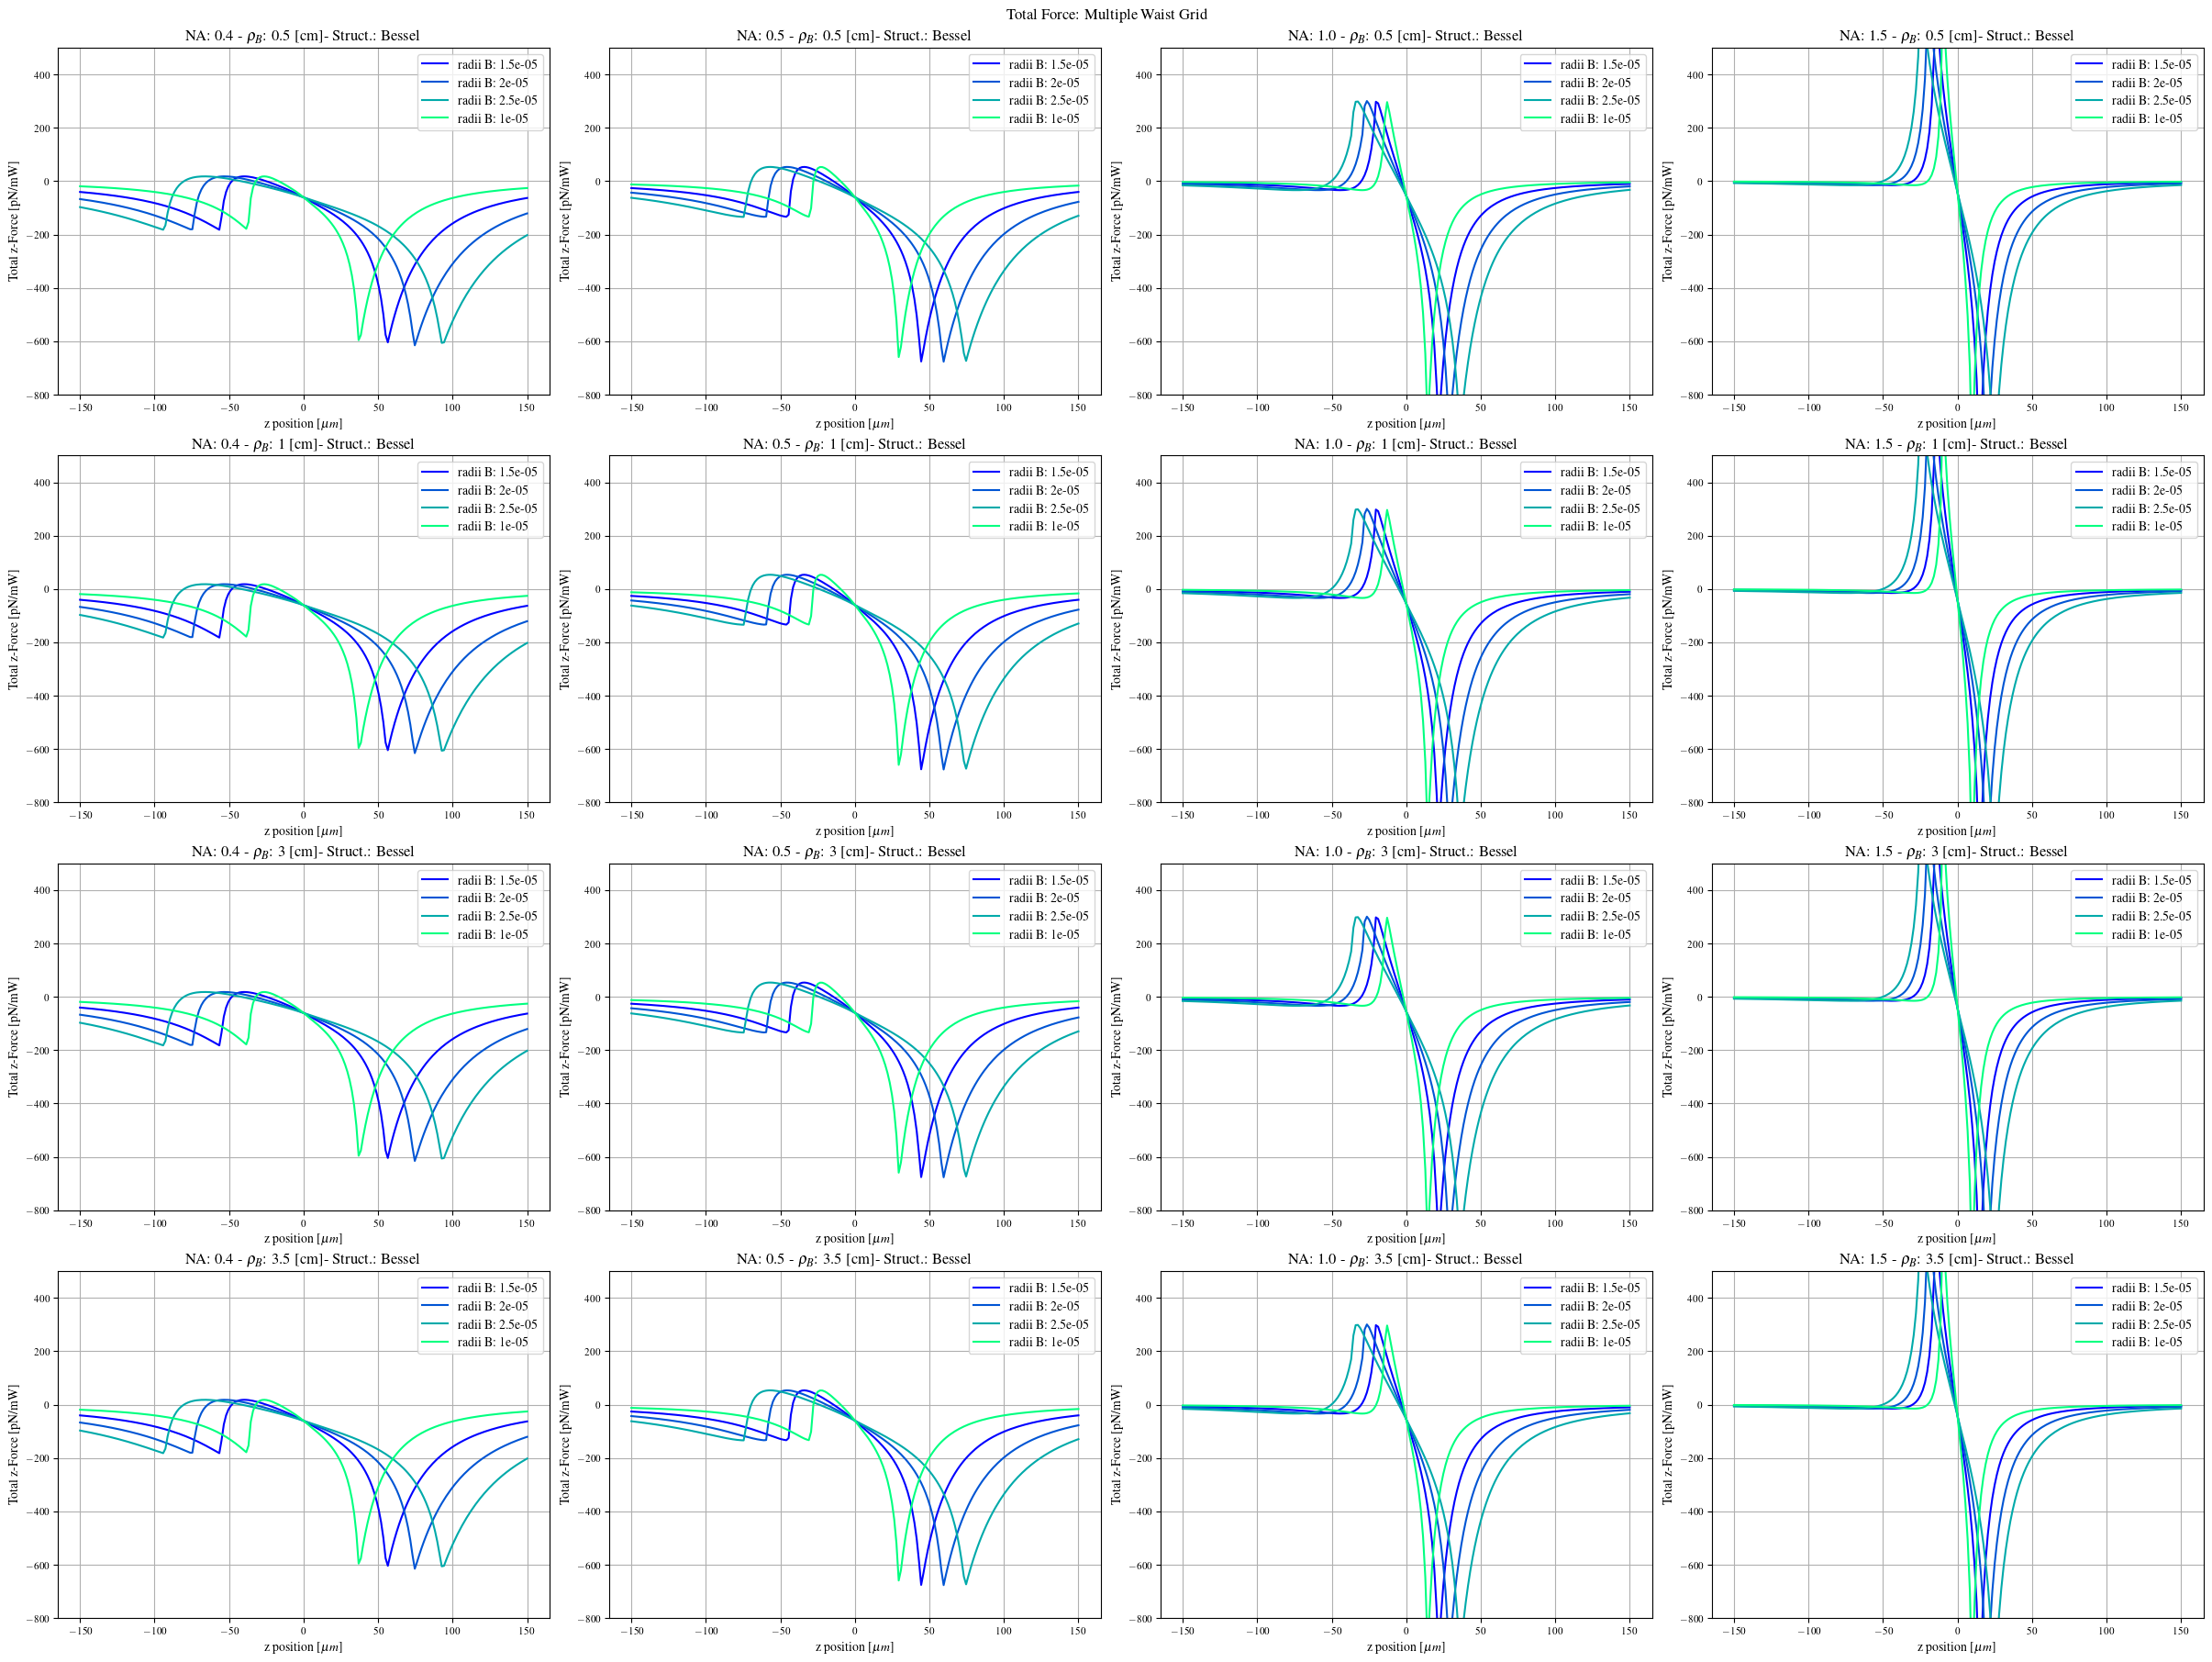

In [62]:
plot_column([f'S_RAD_{i+1}_{j+1}.json' for i in range(4) for j in range(4)], 
           'Bessel', f'Total Force: Multiple Waist Grid', 'radii', 'NA','W',
           f'full_test.png')

In [64]:
c = OpticRTX('waist',structure='Bessel')

RTXModel_structure-Bessel_aberration-False


In [65]:

c.load_simulation('../Final/STF_B_W.json')

In [67]:
np.array([float(i) for i in list(c.simulation_load.keys())])*1e3

array([3. , 1. , 2. , 1.8, 1.6, 1.5, 2.8, 2.6, 1.3, 0.8, 1.1, 2.1, 1.7,
       2.2, 3.5, 1.9, 2.5, 0.7, 2.3, 1.2, 3.4, 3.1, 2.4, 1.4, 2.9, 3.2,
       2.7, 0.9, 3.3, 0.5, 0.6])

In [56]:
np.array(list(c.stiff_values.values()))*1e6

array([[0.84350966],
       [1.55594777],
       [2.17129045],
       [2.51785232]])

A simulation was not generated, checking if loaded simulation exists


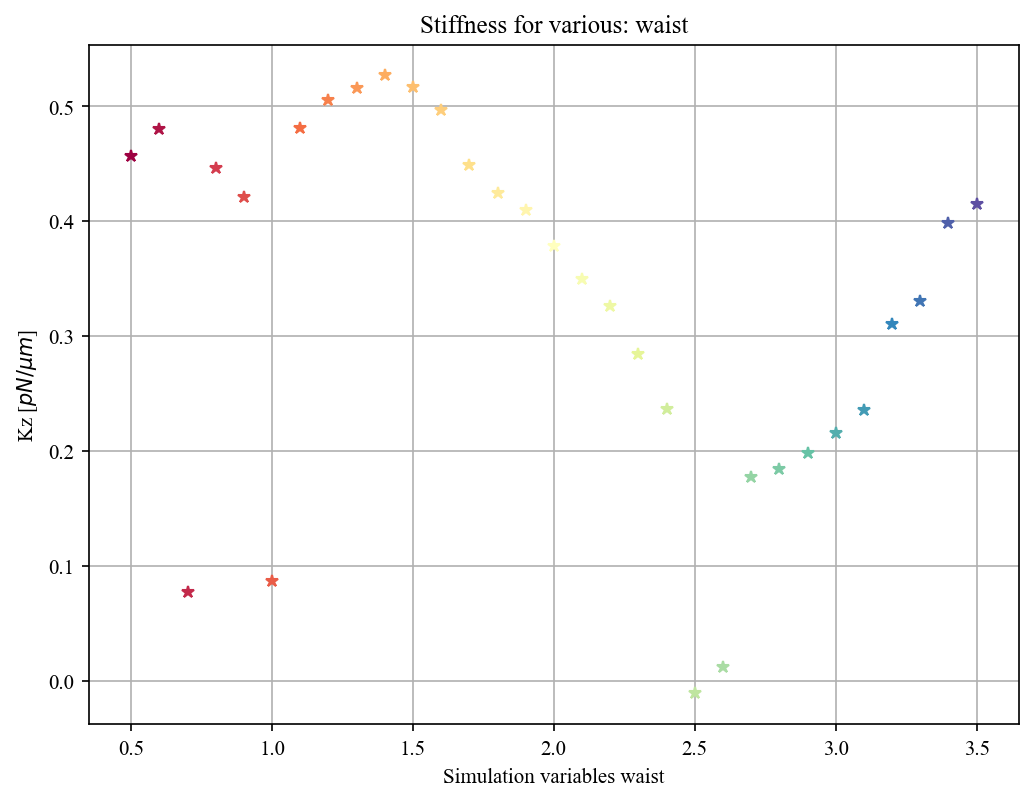

A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, checking if loaded simulation exists
A simulation was not generated, ch

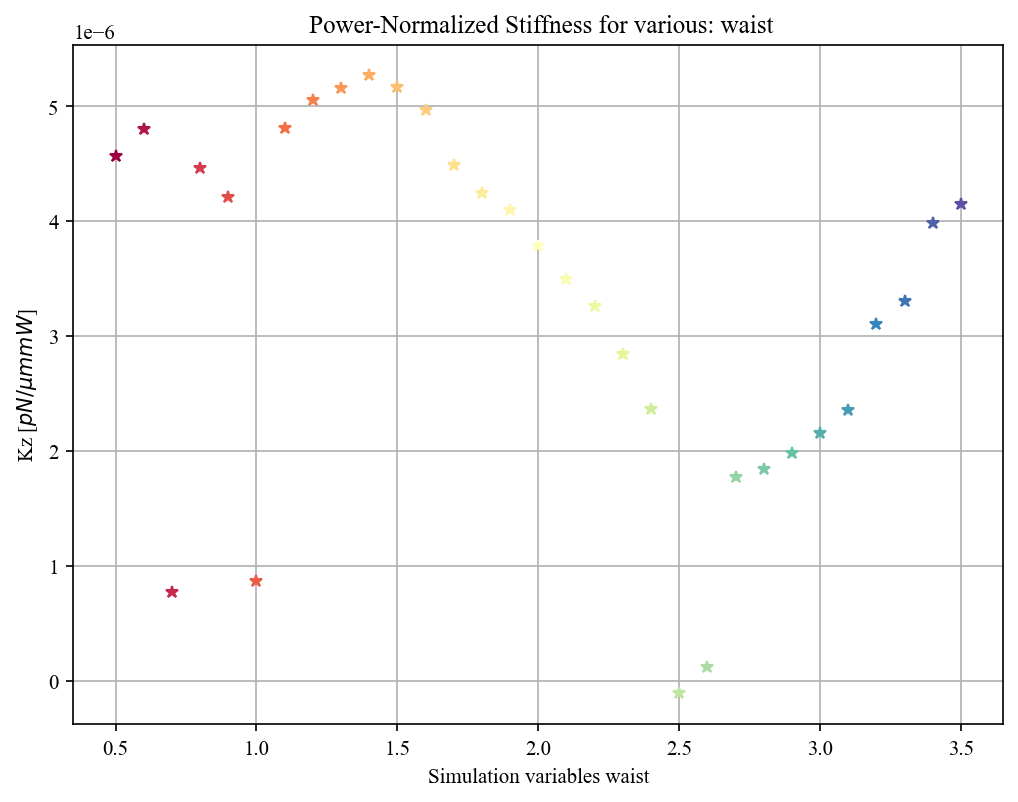

In [68]:
c.stiffness(root=0)

In [13]:
def plot_subplot_stiff(fig, fig_shape, simulation_lists, simulation_lists_gauss=None):
    spec = fig.add_gridspec(ncols=fig_shape[0], nrows=fig_shape[1])
    i=0
    for column in range(fig_shape[0]):
        for row in range(fig_shape[1]):
            ax = fig.add_subplot(spec[row,column])
            plot_stiffness(simulation_lists[i], ax, 'copper')
            if simulation_lists_gauss is not None:
                plot_stiffness(simulation_lists_gauss[i], ax, 'autumn')
            #ax.set_title(f'{t_param_1}: {params[t_param_1]} - {t_param_2}: {params[t_param_2]}')
            ax.grid()
            i+=1

In [65]:
def plot_stiffness(simulation_obj,ax,cmap):
    mpl.rc('xtick', labelsize=8) 
    mpl.rc('ytick', labelsize=8)
    stiff = simulation_obj.get_stiffness(simulation_obj.simulation_load, 'z',0)
    type_ = simulation_obj.structure
    if type_ == 'Bessel':
        labels = [r'$\rho_B$' +f'{i}' for i in simulation_obj.simulation_load.keys()]
    elif type_ == 'Gaussian':
        labels = [r'$W_0$: '+f'{i}' for i in simulation_obj.simulation_load.keys()]
    colorlist = mcp.gen_color(cmap, n = len(labels))
    j = 0
    for i,key in enumerate(sorted(simulation_obj.simulation_load.keys())):
        ax.plot(float(key)*1e3, stiff[key]*1e6, 'o',color=colorlist[i])
        #ax.set_xticks(range(len(labels)), labels)
        ax.grid()
        p = simulation_obj.simulation_load[key]['parameters']
        a,na = p['a']*1e6,p['NA']
        ax.set_title(r'$a$'+f': {np.round(a)}'+r'$[\mu m]$ - '+f'NA: {na}')
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.set_ylabel('Stiffness z-comp [pN/um]')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)  
        j+=1

In [66]:
def plot_column_stiff(file_names, structure, title, variable, t_var_1, t_var_2,sav_fname, gauss=True):
    plt.style.use('default')
    plt.rcParams['text.usetex'] = True
    mpl.rc('xtick', labelsize=8) 
    mpl.rc('ytick', labelsize=8)
    mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
    sim_list = []
    for i in range(len(file_names)):
        sim_list.append(OpticRTX(variable,structure=structure))
    for i,j in enumerate(file_names):
        sim_list[i].load_simulation(f'../Final/{j}')
    if gauss:
        sim_list_gauss = []
        for i in range(len(file_names)):
            sim_list_gauss.append(OpticRTX(variable,structure='Gaussian'))
        for i,j in enumerate([i.replace('WB','WG') for i in file_names]):
            sim_list_gauss[i].load_simulation(f'../Final/{j}')
    else:
        sim_list_gauss = None

    #sim_list = [test, test, test, test]
    fig = plt.figure(layout='constrained', figsize=(18,24))
    plot_subplot_stiff(fig, [2,4], sim_list, sim_list_gauss)
    fig.suptitle(title)

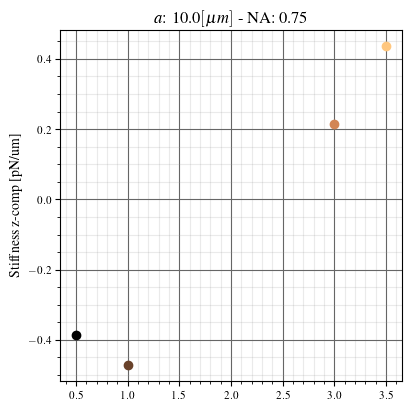

In [67]:
fig = plt.figure(layout='constrained', figsize=(4,4))
grid = fig.add_gridspec(nrows=1,ncols=1)
ax0 = fig.add_subplot(grid[0])
plot_stiffness(c, ax0,'copper')

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False


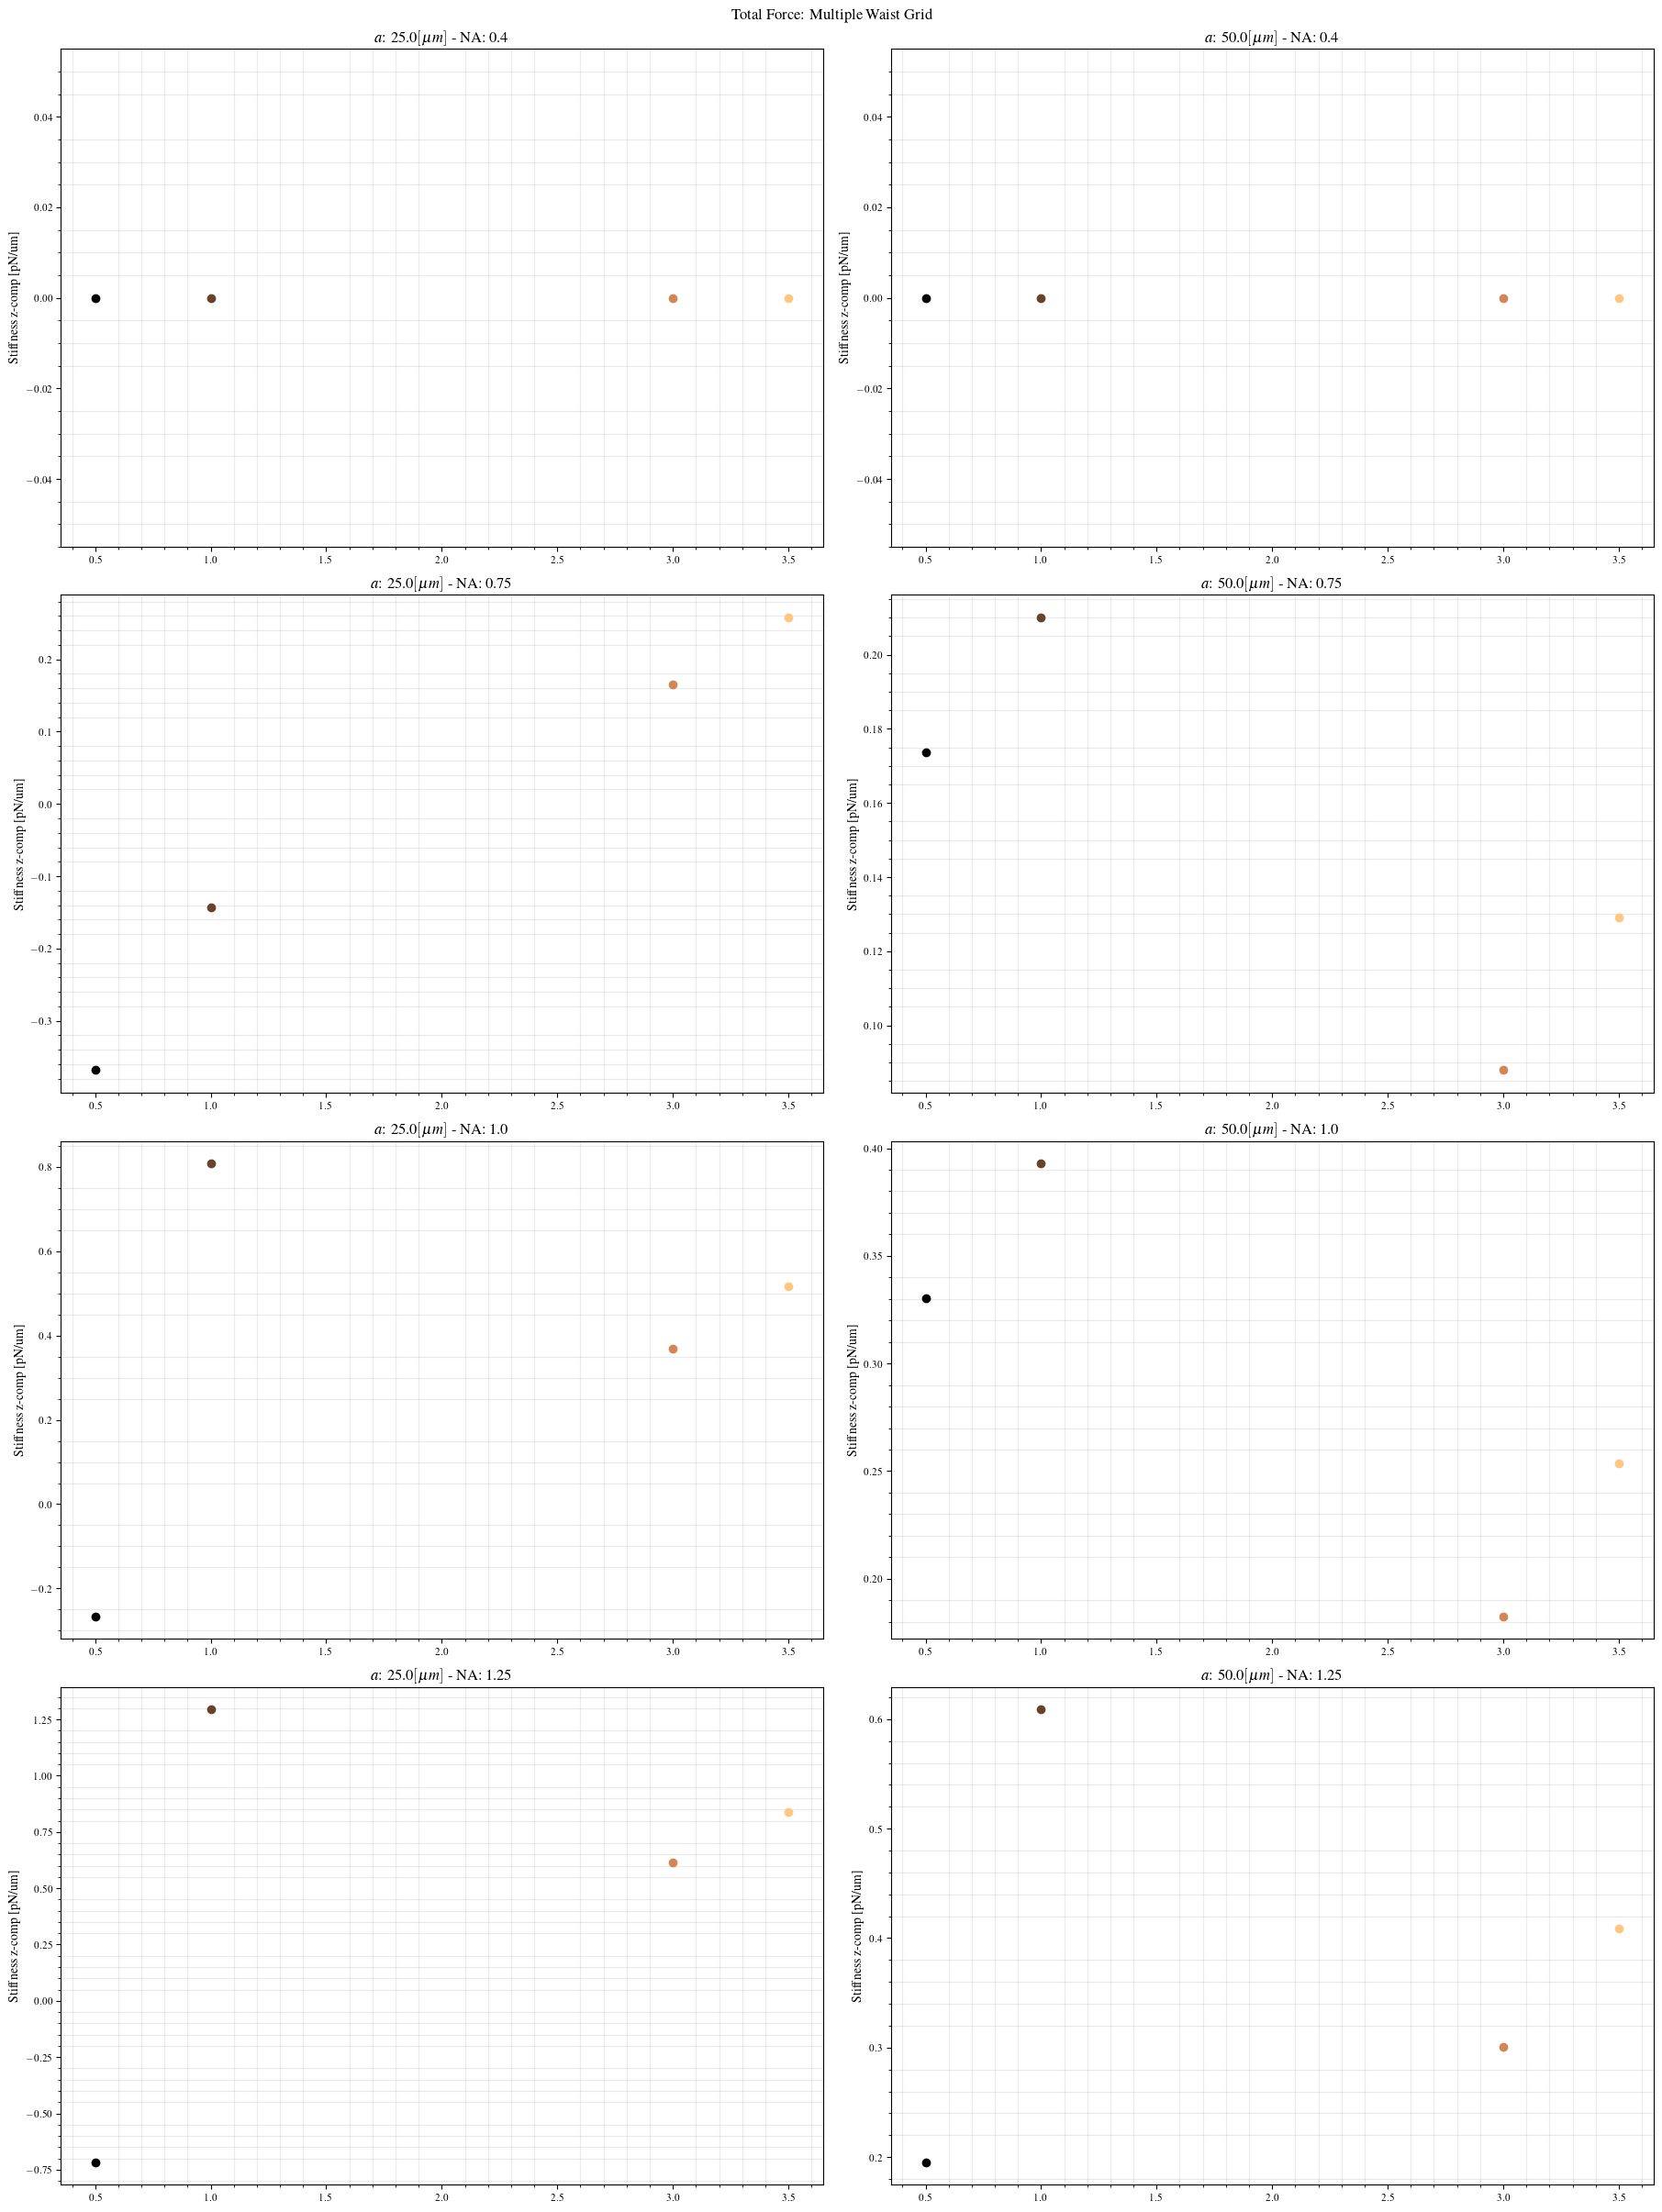

In [68]:
plot_column_stiff([f'S_WB_{i}_{j}.json' for i in range(3,5) for j in range(1,5)], 
           'Bessel', f'Total Force: Multiple Waist Grid', 'W', 'a','NA',
           f'full_test_stiff.png', gauss=False)